# Web Scraping from Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary classifier.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title, and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use a random forest classifier, as well as another classifier of your choice; either logistic regression, SVM, or KNN. 

- **Question**: Why would we want this to be a classification problem?
- **Answer**: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Set up a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)
The URL here has many query parameters
- q for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- l for a location
- start for what result number to start on

In [1]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"


In [2]:
import urllib
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import re


Let's look at one result more closely. A single result looks like
```JSON
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&campaignid=serp-linkcompanyname&fromjk=2480d203f7e97210&jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a nobr element inside of a td element with class='snip.
- The title of a job is in a link with class set to jobtitle and a data-tn-element="jobTitle.
- The location is set in a span with class='location'.
- The company is set in a span with class='company'.

## Write 4 functions to extract these items (one function for each): location, company, job title, and salary.¶
Example
```python
def extract_location_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

In [3]:
###  all of the find_alls merged into one large function, so the code. 

def parse(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding = "utf-8")
    df = pd.DataFrame(columns = ["Title","Location","Company","Salary", "Synopsis"])
    
    for each in soup.find_all(class_ =  "result" ):
        try: 
            title = each.find(class_ = 'jobtitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find('span', {'class':"location" }).text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_ = 'company').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text
        except:
            salary = 'None'
        try:    
            synopsis = each.find('span', {'class': 'summary'}).text.replace('\n', '')
        except:
            synopsis = 'None'
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary, 'Synopsis':synopsis}, ignore_index = True)
    return df


In [4]:
parse(URL)

,Title,Location,Company,Salary,Synopsis
0,Senior Scientist Cyber Security,None,Quanterion Solutions Incorporated,None,None
1,Data Scientist,None,Disney Streaming Services,None,None
2,Data Scientist/Quantitative Analyst at Fintech...,None,Blue Elephant Solutions LLC,None,None
3,"Scientist, Systems Engineering",None,Harris Corp,None,None
4,Principal Data Scientist,None,Verizon,None,None
5,Lead Data Scientist,None,Verizon,None,None
6,Data Scientist,None,VISITING NURSE SERVICE OF NEW YORK,None,None
7,Data Scientist,"New York, NY 10048",Conde Nast,None,None
8,Data Analyst / Data Scientist,"New York, NY",Defined Clarity,\n $65 - $75 an hour,None
9,Data Scientist,"New York, NY 10019 (Midtown area)",Hearst,None,None


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.
- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the l=New+York and the start=10. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).
##### Complete the following code to collect results from multiple cities and starting points.
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [ ]:
YOUR_CITY = 'Washington%2C+DC'

In [ ]:

url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 2000 # Set this to a high-value (5000) to generate more results.

# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
i = 0
results = []
df_more = pd.DataFrame(columns = ["Title","Location","Company","Salary", "Synopsis"])

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY, 
    'Charlottesville', 'Richmond', 'Baltimore', 'Harrisonburg', 'San+Antonio', 'San+Diego', 'San+Jose'
    'Austin', 'Jacksonville', 'Indianapolis', 'Columbus', 'Fort+Worth', 'Charlotte', 'Detroit', 'El+Paso', 
    'Memphis', 'Boston', 'Nashville', 'Louisville', 'Milwaukee', 'Las+Vegas', 'Albuquerque', 'Tucson', 
    'Fresno', 'Sacramento', 'Long+Beach', 'Mesa', 'Virginia+Beach', 'Norfolk', 'Atlanta', 'Colorado+Springs',
    'Raleigh', 'Omaha', 'Oakland', 'Tulsa', 'Minneapolis', 'Cleveland', 'Wichita', 'Arlington', 'New+Orleans', 
    'Bakersfield', 'Tampa', 'Honolulu', 'Anaheim', 'Aurora', 'Santa+Ana', 'Riverside', 'Corpus+Christi', 'Pittsburgh', 
    'Lexington', 'Anchorage', 'Cincinnati', 'Baton+Rouge', 'Chesapeake', 'Alexandria', 'Fairfax', 'Herndon',
    'Reston', 'Roanoke']):
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        url = url_template.format(city, start)
        # Append to the full set of results
        html = requests.get(url)
        soup = BeautifulSoup(html.content, 'html.parser', from_encoding = "utf-8")
        for each in soup.find_all(class_ =  "result" ):
            try: 
                title = each.find(class_ = 'jobtitle').text.replace('\n', '')
            except:
                title = None
            try:
                location = each.find('span', {'class':"location" }).text.replace('\n', '')
            except:
                location = None
            try: 
                company = each.find(class_ = 'company').text.replace('\n', '')
            except:
                company = None
            try:
                salary = each.find('span', {'class':'no-wrap'}).text
            except:
                salary = None
            try:
                synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
            except:
                synopsis = None
                
            df_more = df_more.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary, 'Synopsis':synopsis}, ignore_index = True)
            i += 1
            if i % 1000 == 0:  # Ram helped me build this counter to see how many. You can visibly see Ram's vernacular in the print statements.
                print('You have ' + str(i) + ' results. ' + str(df_more.dropna().drop_duplicates().shape[0]) + " of these aren't rubbish.") 
                
                
            

You have 1000 results. 0 of these aren't rubbish.
You have 2000 results. 0 of these aren't rubbish.
You have 3000 results. 0 of these aren't rubbish.
You have 4000 results. 0 of these aren't rubbish.
You have 5000 results. 0 of these aren't rubbish.
You have 6000 results. 0 of these aren't rubbish.
You have 7000 results. 0 of these aren't rubbish.
You have 8000 results. 0 of these aren't rubbish.
You have 9000 results. 0 of these aren't rubbish.
You have 10000 results. 0 of these aren't rubbish.
You have 11000 results. 0 of these aren't rubbish.
You have 12000 results. 0 of these aren't rubbish.
You have 13000 results. 0 of these aren't rubbish.
You have 14000 results. 0 of these aren't rubbish.
You have 15000 results. 0 of these aren't rubbish.
You have 16000 results. 0 of these aren't rubbish.
You have 17000 results. 0 of these aren't rubbish.
You have 18000 results. 0 of these aren't rubbish.
You have 19000 results. 0 of these aren't rubbish.
You have 20000 results. 0 of these aren'

In [ ]:
df_more.to_csv('IndeedJobsDataRawNotCleaned.csv', encoding = 'utf-8')

In [ ]:
df_more = pd.read_csv('/Users/nehatalwar/Desktop/IndeedJobsDataRawNotCleaned.csv')

In [ ]:
df_more.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df_more.head()

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [ ]:
print (df_more.head())
print (df_more.shape)
print (df_more[df_more.Salary != 'None'].shape)
df_more = df_more[df_more.Salary != 'None'].drop_duplicates().dropna()
print (df_more.shape)


In [ ]:
df_more = df_more[df_more.Salary.str.contains("hour") == False]
df_more = df_more[df_more.Salary.str.contains("month") == False]
print (df_more.shape)
df_more.head()


#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [ ]:
def salary_stripper(dataframe, column):
    dataframe[str(column)] = dataframe[str(column)].replace({'\$':''}, regex = True)
    dataframe[str(column)].replace(regex = True, inplace = True, to_replace = r'\D', value = r' ')
    dataframe[str(column)] = dataframe[str(column)].str.replace(' '  ,  ',')
    dataframe = dataframe.join(dataframe[str(column)].str.split(',,,'  , 1 ,  expand = True).rename(columns = {0:'Low', 1:'High'}))
    dataframe['Low'] = dataframe['Low'].str.replace(',' , '')
    dataframe['Low'] = dataframe['Low'].astype('float64')
    dataframe.drop(str(column), axis = 1, inplace = True)
    dataframe['High'] = dataframe['High'].str.replace(',' , '')
    dataframe['High'] = dataframe['High'].apply(pd.to_numeric)
    dataframe['Average'] = dataframe[['Low', 'High']].mean(axis = 1)
    return dataframe



In [ ]:
df_more = salary_stripper(df_more, 'Salary')

In [ ]:
df_more[50:60]

In [269]:
df_more = df_more.join(df_more['Location'].str.split(',', 1, expand = True).rename(columns = {0:'City', 1:'State'}))

In [270]:
df_more.head()

,Title,Location,Company,Synopsis,Low,High,Average,City,State
2724,Environmental Consultant,"Nashville, TN 37220",LP Environmental,We are seeking a mid-level Environmental Scien...,50000.0,100000.0,75000.0,Nashville,TN 37220
8054,Data Scientist – Marketing Analytics,"Chicago, IL 60601 (Loop area)",Enterprise Select,We are currently looking for an experienced Da...,125000.0,NaN,125000.0,Chicago,IL 60601 (Loop area)
8194,Research Analyst,"Chicago, IL",Illinois Criminal Justice Information Authority,Produce analyses of crime trends and provide d...,55000.0,60000.0,57500.0,Chicago,IL
8197,Research Analyst,"Chicago, IL 60606 (Loop area)",ICJIA,(3) analyzing qualitative and quantitative dat...,55000.0,60000.0,57500.0,Chicago,IL 60606 (Loop area)
8234,"Data Scientist (Python, R, AWS, Azure)","Chicago, IL",Workbridge Associates,Our startup client working on risk and fraud d...,85000.0,125000.0,105000.0,Chicago,IL


In [271]:
def strip_state(x):
    if x != None:
        return x[0:3]
    else:
        None
df_more['State Initials'] = df_more['State'].apply(strip_state)
df_more.head()



,Title,Location,Company,Synopsis,Low,High,Average,City,State,State Initials
2724,Environmental Consultant,"Nashville, TN 37220",LP Environmental,We are seeking a mid-level Environmental Scien...,50000.0,100000.0,75000.0,Nashville,TN 37220,TN
8054,Data Scientist – Marketing Analytics,"Chicago, IL 60601 (Loop area)",Enterprise Select,We are currently looking for an experienced Da...,125000.0,NaN,125000.0,Chicago,IL 60601 (Loop area),IL
8194,Research Analyst,"Chicago, IL",Illinois Criminal Justice Information Authority,Produce analyses of crime trends and provide d...,55000.0,60000.0,57500.0,Chicago,IL,IL
8197,Research Analyst,"Chicago, IL 60606 (Loop area)",ICJIA,(3) analyzing qualitative and quantitative dat...,55000.0,60000.0,57500.0,Chicago,IL 60606 (Loop area),IL
8234,"Data Scientist (Python, R, AWS, Azure)","Chicago, IL",Workbridge Associates,Our startup client working on risk and fraud d...,85000.0,125000.0,105000.0,Chicago,IL,IL


### Save your results as a CSV

In [272]:
df_more.to_csv('IndeedJobsData.csv', encoding='utf-8')

## Predicting salaries using Random Forests + Another Classifier

#### Load in the the data of scraped salaries

In [508]:
df_more = pd.read_csv('/Users/nehatalwar/Desktop/IndeedJobsData.csv', index_col = 0)
df_more = df_more.reset_index(drop = True)
df_more.head()

,Title,Location,Company,Synopsis,Low,High,Average,City,State,State Initials
0,Environmental Consultant,"Nashville, TN 37220",LP Environmental,We are seeking a mid-level Environmental Scien...,50000.0,100000.0,75000.0,Nashville,TN 37220,TN
1,Data Scientist – Marketing Analytics,"Chicago, IL 60601 (Loop area)",Enterprise Select,We are currently looking for an experienced Da...,125000.0,NaN,125000.0,Chicago,IL 60601 (Loop area),IL
2,Research Analyst,"Chicago, IL",Illinois Criminal Justice Information Authority,Produce analyses of crime trends and provide d...,55000.0,60000.0,57500.0,Chicago,IL,IL
3,Research Analyst,"Chicago, IL 60606 (Loop area)",ICJIA,(3) analyzing qualitative and quantitative dat...,55000.0,60000.0,57500.0,Chicago,IL 60606 (Loop area),IL
4,"Data Scientist (Python, R, AWS, Azure)","Chicago, IL",Workbridge Associates,Our startup client working on risk and fraud d...,85000.0,125000.0,105000.0,Chicago,IL,IL


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [509]:
median = df_more['Average'].median()
print ('The median salary for our data set is $' + str(median))


The median salary for our data set is $86711.0


In [510]:
def above_median(x):
    if x > median:
        return 1
    return 0

df_more['Above Median'] = df_more['Average'].apply(above_median)
df_more.head()


,Title,Location,Company,Synopsis,Low,High,Average,City,State,State Initials,Above Median
0,Environmental Consultant,"Nashville, TN 37220",LP Environmental,We are seeking a mid-level Environmental Scien...,50000.0,100000.0,75000.0,Nashville,TN 37220,TN,0
1,Data Scientist – Marketing Analytics,"Chicago, IL 60601 (Loop area)",Enterprise Select,We are currently looking for an experienced Da...,125000.0,NaN,125000.0,Chicago,IL 60601 (Loop area),IL,1
2,Research Analyst,"Chicago, IL",Illinois Criminal Justice Information Authority,Produce analyses of crime trends and provide d...,55000.0,60000.0,57500.0,Chicago,IL,IL,0
3,Research Analyst,"Chicago, IL 60606 (Loop area)",ICJIA,(3) analyzing qualitative and quantitative dat...,55000.0,60000.0,57500.0,Chicago,IL 60606 (Loop area),IL,0
4,"Data Scientist (Python, R, AWS, Azure)","Chicago, IL",Workbridge Associates,Our startup client working on risk and fraud d...,85000.0,125000.0,105000.0,Chicago,IL,IL,1


#### Thought experiment: What is the baseline accuracy for this model?

In [511]:
df_more['Above Median'].value_counts()

0    205
1    204
Name: Above Median, dtype: int64

Baseline accuracy for our model would be about 50/50 because if we flipped a coin to determine whether or not a value is above or below the median, we have a 50/50 chance. 

#### Create a Random Forest model to predict High/Low salary using Sklearn. Start by ONLY using the location as a feature. 

In [512]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from ipywidgets import *
from IPython.display import display
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.cross_validation import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.cross_validation import train_test_split


In [513]:
df_city_dummy = pd.get_dummies(df_more['City'])
df_city_dummy.head()


,Albemarle County,Albuquerque,Anchorage,Arlington,Atlanta,Auburn,Aurora,Austin,Bakersfield,Baltimore,...,Tampa,Tampa Bay,Tempe,Tripler Army Medical Center,Tucson,Washington,West Point,Wichita,Wilmington,Woodlawn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [514]:
df_state_dummy = pd.get_dummies(df_more['State Initials'])
df_state_dummy.head()

,AK,AZ,CA,CO,DC,DE,FL,GA,HI,IL,...,NV,NY,OH,OR,PA,TN,TX,VA,WA,WI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [515]:
model = RandomForestClassifier(n_estimators = 100, oob_score = True)
X = df_city_dummy
y = df_more['Above Median']
cv_model = cross_val_score(model, X, y, cv = 6)
print 'Cross-validated scores:', cv_model
print 'Average score:', cv_model.mean()
print 'Standard deviation of score:', cv_model.std()
model.fit(X, y)
print (model.oob_score_)


Cross-validated scores: [ 0.50724638  0.38235294  0.45588235  0.55882353  0.61764706  0.51470588]
Average score: 0.506109690253
Standard deviation of score: 0.0743113252437
0.677261613692


It seems that the city locations are slightly better than our baseline accuracy of 50/50. 

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the job titles.
- Build a new random forest model with location and these new features included.

In [516]:
def senior(x):
    if 'Senior' in x:
        return 1
    return 0

df_more['Senior'] = df_more['Title'].apply(senior)


In [517]:
df_more[df_more.Senior != 0]

,Title,Location,Company,Synopsis,Low,High,Average,City,State,State Initials,Above Median,Senior
19,Senior Data Scientist / Machine Learning Engineer,"Northbrook, IL",Request Technology,Seeking a Senior Data Scientist / Machine Lear...,130000.0,135000.0,132500.0,Northbrook,IL,IL,1,1
20,Senior Data Scientist,"Chicago, IL",Go2Group,Seeking a Data Scientist (Consultant to Archit...,130000.0,190000.0,160000.0,Chicago,IL,IL,1,1
24,Senior Data Scientist,"Chicago, IL",Workbridge Associates,You will be building out new predictive models...,130000.0,NaN,130000.0,Chicago,IL,IL,1,1
25,Senior Data Scientist - Modeling,"Chicago, IL",TS Kandilit,Sr Data Scientist – Modeling. Candidates with ...,100000.0,125000.0,112500.0,Chicago,IL,IL,1,1
29,Senior Data Engineer,"Chicago, IL",Jobspring Partners,Full stack data scientists looking to grow wit...,115000.0,130000.0,122500.0,Chicago,IL,IL,1,1
31,"Senior Data Engineer (AWS RedShift, MySQL, Pyt...","Chicago, IL",Workbridge Associates,Our client's Data Scientists and Engineers are...,80000.0,110000.0,95000.0,Chicago,IL,IL,1,1
38,Senior Data Scientist,"San Francisco, CA 94102 (Downtown area)",Aquila,Identify and own data latency and data quality...,100000.0,150000.0,125000.0,San Francisco,CA 94102 (Downtown area),CA,1,1
50,Senior Data Scientist Healthcare,"Philadelphia, PA",Harnham,Senior Data Scientist - Healthcare. Reporting ...,170000.0,NaN,170000.0,Philadelphia,PA,PA,1,1
65,Senior Statistician/Data Scientist-PHARMA,"Horsham, PA",Smith Hanley Associates,Statistician/Data Scientist Responsibilities. ...,120000.0,NaN,120000.0,Horsham,PA,PA,1,1
66,Senior Front-End Engineer,"Philadelphia, PA",Jobspring Partners,One will be a web-based application used by da...,135000.0,155000.0,145000.0,Philadelphia,PA,PA,1,1


In [518]:
def manager(x):
    if 'Manager' in x:
        return 1
    return 0

df_more['Manager'] = df_more['Title'].apply(manager)


In [519]:
df_more[df_more.Manager != 0]


,Title,Location,Company,Synopsis,Low,High,Average,City,State,State Initials,Above Median,Senior,Manager
43,District Sales Manager,"Dallas, TX",Anchor Point Technology Resources,"Ability to handle technical processes, data ga...",100000.0,NaN,100000.0,Dallas,TX,TX,1,0,1
79,"Laboratory Manager, IRL Blood Bank","Central, IN",Lighthouse Recruiting,Join the New Medical Laboratory Scientists Gro...,70000.0,87000.0,78500.0,Central,IN,IN,0,0,1
112,Computational Image Data Analysis Manager,"Bethesda, MD",Medical Science & Computing,Analysis of biopsy and resection samples from ...,100000.0,NaN,100000.0,Bethesda,MD,MD,1,0,1
125,Senior Product Manager,"Washington, DC",Catalist,Conversant understanding of relational data an...,70000.0,100000.0,85000.0,Washington,DC,DC,0,1,1
183,"2017-07-10 IT Program Manager Earning $$213,000","McLean, VA",EMF Industries,"Our talented group of Data Scientists, Develop...",213000.0,NaN,213000.0,McLean,VA,VA,1,0,1
199,Account Manager,"Charlotte, NC 28204 (Elizabeth area)",The Creative Group,You're fascinated by data analytics:. You may ...,50000.0,60000.0,55000.0,Charlotte,NC 28204 (Elizabeth area),NC,0,0,1
203,Analytics Manager (Machine Learning),"Charlotte, NC","Kennedy Unlimited Inc, Professional Staffing",8 Plus years of modeling experience in Big Dat...,120000.0,150000.0,135000.0,Charlotte,NC,NC,1,0,1
221,District Sales Manager,"Wichita, KS",Anchor Point Technology Resources,"Ability to handle technical processes, data ga...",100000.0,NaN,100000.0,Wichita,KS,KS,1,0,1
241,"Laboratory Manager, Pulmonary and Endothelial ...","Tucson, AZ",University of Arizona,"Carry out laboratory processing of samples, in...",60000.0,80000.0,70000.0,Tucson,AZ,AZ,0,0,1
254,"Accounting Manager (Phoenix, Arizona)","Tucson, AZ",University of Arizona,"Interprets various accounting data, analyzes r...",48645.0,74251.0,61448.0,Tucson,AZ,AZ,0,0,1


In [520]:
def engineer(x):
    if 'Engineer' in x:
        return 1
    return 0

df_more['Engineer'] = df_more['Title'].apply(engineer)


In [521]:
df_more[df_more.Engineer != 0]


,Title,Location,Company,Synopsis,Low,High,Average,City,State,State Initials,Above Median,Senior,Manager,Engineer
14,Data Scientist/Engineer,"Chicago, IL",Jobspring Partners,They would ideally have a STEM/Quantitative de...,70000.0,80000.0,75000.0,Chicago,IL,IL,0,0,0,1
19,Senior Data Scientist / Machine Learning Engineer,"Northbrook, IL",Request Technology,Seeking a Senior Data Scientist / Machine Lear...,130000.0,135000.0,132500.0,Northbrook,IL,IL,1,1,0,1
21,Data Engineer/Scientist,"Chicago, IL",Workbridge Associates,"Big Data experience with Hadoop, Spark, Pig. A...",90000.0,125000.0,107500.0,Chicago,IL,IL,1,0,0,1
22,Machine Learning Engineer (Ruby),"Chicago, IL",Jobspring Partners,Experience working with electronic medical rec...,110000.0,130000.0,120000.0,Chicago,IL,IL,1,0,0,1
26,Software Engineer (Python),"Chicago, IL",Jobspring Partners,Brand new product that is used globally by the...,75000.0,110000.0,92500.0,Chicago,IL,IL,1,0,0,1
29,Senior Data Engineer,"Chicago, IL",Jobspring Partners,Full stack data scientists looking to grow wit...,115000.0,130000.0,122500.0,Chicago,IL,IL,1,1,0,1
30,Civil/ Environmental Engineer,"Lombard, IL 60148","Andrews Engineering, Inc.",Analyzing Data or Information. Collaborate wit...,50000.0,65000.0,57500.0,Lombard,IL 60148,IL,0,0,0,1
31,"Senior Data Engineer (AWS RedShift, MySQL, Pyt...","Chicago, IL",Workbridge Associates,Our client's Data Scientists and Engineers are...,80000.0,110000.0,95000.0,Chicago,IL,IL,1,1,0,1
39,Sales Engineer,"San Francisco, CA",Pentaho a Hitachi Company,"ETL, data warehousing and data engineering. Co...",190000.0,200000.0,195000.0,San Francisco,CA,CA,1,0,0,1
49,Data Analytics Engineer,"Philadelphia, PA",CEI,Data Analytics Engineer*. An experienced data ...,85000.0,NaN,85000.0,Philadelphia,PA,PA,0,0,0,1


In [522]:
def data_scientist(x):
    if 'Data Scientist' in x:
        return 1
    return 0

df_more['Data Scientist'] = df_more['Title'].apply(data_scientist)

In [523]:
def analyst(x):
    if 'Analyst' in x:
        return 1
    return 0

df_more['Analyst'] = df_more['Title'].apply(analyst)

In [524]:
def assistant(x):
    if 'Assistant' in x:
        return 1
    return 0

df_more['Assistant'] = df_more['Title'].apply(assistant)

In [525]:
def internship(x):
    if 'Intern' in x:
        return 1
    return 0

df_more['Intern'] = df_more['Title'].apply(internship)

In [526]:
def developer(x):
    if 'Developer' in x:
        return 1
    return 0

df_more['Developer'] = df_more['Title'].apply(developer)

In [527]:
def machine_learning(x):
    if 'Machine Learning' in x:
        return 1
    return 0

df_more['Machine Learning'] = df_more['Title'].apply(machine_learning)

In [528]:
feature_matrix = df_more.copy(deep = True)
feature_matrix.drop(['Title', 'Location', 'Company', 'Synopsis', 'Low', 'High', 'Average', 'City', 'State', 'Above Median', 'State Initials'], axis = 1, inplace = True)
print (feature_matrix.shape)
feature_matrix.head()



(409, 9)


,Senior,Manager,Engineer,Data Scientist,Analyst,Assistant,Intern,Developer,Machine Learning
0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [529]:
model = RandomForestClassifier(n_estimators = 100, oob_score = True)
X_features = pd.concat([df_city_dummy, feature_matrix, df_state_dummy], axis = 1)
y = df_more['Above Median']
cv_model = cross_val_score(model, X_features, y, cv = 6)
print 'Cross-validated scores:', cv_model
print 'Average score:', cv_model.mean()
print 'Standard deviation of score:', cv_model.std()
model.fit(X_features, y)
print (model.oob_score_)



Cross-validated scores: [ 0.69565217  0.61764706  0.51470588  0.75        0.55882353  0.60294118]
Average score: 0.623294970162
Standard deviation of score: 0.0792507223991
0.745721271394


Adding in the key words ('Senior', 'Manager', 'Data Scientist', 'Analyst', 'Assistant', 'Intern', and 'Developer) brought the accuracy up from  50% to around 63%. Let's attempt to increase this by using a CountVectorizer on the title column. 

In [587]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words = 'english', max_features = 30, ngram_range = (2,2))
vectorizers = cvec.fit_transform(df_more['Title'].values)

df_vec  = pd.DataFrame(vectorizers.todense(), columns = cvec.get_feature_names())
print (df_vec.shape)
df_vec.head()


(409, 30)


,analyst bureau,analytics machine,clinical laboratory,computer scientist,data analyst,data engineer,data science,data scientist,director data,forensic scientist,...,research analyst,research assistant,research associate,research scientist,research specialist,scientist machine,senior data,senior research,software engineer,statistical analyst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [541]:
X_cvec = pd.concat([df_vec, df_city_dummy, df_state_dummy], axis = 1)
X_cvec.head()

,analyst bureau,analytics machine,clinical laboratory,computer scientist,data analyst,data engineer,data science,data scientist,director data,forensic scientist,...,NV,NY,OH,OR,PA,TN,TX,VA,WA,WI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [555]:
model = RandomForestClassifier(n_estimators = 100, oob_score = True)
y = df_more['Above Median']
cv_model = cross_val_score(model, X_cvec, y, cv = 6)
print 'Cross-validated scores:', cv_model
print 'Average score:', cv_model.mean()
print 'Standard deviation of score:', cv_model.std()
model.fit(X_cvec, y)
print (model.oob_score_)
importance_dataframe = pd.DataFrame(model.feature_importances_, index = X_cvec.columns, columns = ['importance']).sort_values('importance', ascending = False)
importance_dataframe.head(20)



Cross-validated scores: [ 0.69565217  0.64705882  0.52941176  0.73529412  0.54411765  0.66176471]
Average score: 0.635549872123
Standard deviation of score: 0.0752839339804
0.775061124694


,importance
data scientist,0.115866
research analyst,0.056278
machine learning,0.033574
AZ,0.025583
research scientist,0.019420
data analyst,0.018224
CA,0.017618
senior data,0.016279
MA,0.015827
Chicago,0.014780


The top description features are data scientist, research analyst, machine learning, and research scientist. This dataframe will be important later in our project. 

Using the count vectorizer (and a max of 30 new word features) has increased our accuracy to around 67%. 

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

The code above contains cross-validated accuracy scores for each model. The Random Forest Classifier with the description words Count Vectorized and the location dummies has an average accuracy score of 67%. 

#### Repeat the model-building process with a non-tree-based method.

In [543]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression()
scores_log = cross_val_score(log_reg, X_cvec, y, cv = 6)
print 'Cross-validated scores:', scores_log
print 'Average score:', scores_log.mean()
print 'Standard deviation of score:', scores_log.std()
log_model = log_reg.fit(X_cvec, y)



Cross-validated scores: [ 0.72463768  0.64705882  0.60294118  0.75        0.63235294  0.67647059]
Average score: 0.672243535095
Standard deviation of score: 0.0513767594108


A logistic regression gets an average accuracy score of 65%, which isn't that much worse than our Random Forest Classifier. 

In [544]:
from sklearn.svm import SVC
model_svmrbf = SVC(kernel = 'rbf')
scores_svm = cross_val_score(model_svmrbf, X_cvec, y, cv = 6)
print 'Cross-validated scores:', scores_svm
print 'Average score:', scores_svm.mean()
print 'Standard deviation of score:', scores_svm.std()
svm_model = model_svmrbf.fit(X_cvec, y)



Cross-validated scores: [ 0.73913043  0.52941176  0.60294118  0.52941176  0.58823529  0.63235294]
Average score: 0.60358056266
Standard deviation of score: 0.0712267796773


In [545]:
model_svmlm = SVC(kernel = 'linear')
scores_svmlm = cross_val_score(model_svmlm, X_cvec, y, cv = 6)
print 'Cross-validated scores:', scores_svmlm
print 'Average score:', scores_svmlm.mean()
print 'Standard deviation of score:', scores_svmlm.std()
svm_model = model_svmlm.fit(X_cvec, y)



Cross-validated scores: [ 0.69565217  0.64705882  0.45588235  0.63235294  0.63235294  0.66176471]
Average score: 0.62084398977
Standard deviation of score: 0.0768496806339


The radial basis kernel support vector machine performs better than the linear kernel support vector machine. The RBF SVM gets an accuracy score of 69%. This is higher than our Random Forest Classifier. 

In [546]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = (100,), random_state = 1, activation = 'relu')
cv_model = cross_val_score(clf, X_cvec, y, cv = 5)
print 'Cross-validated scores:', cv_model
print 'Average score:', cv_model.mean()
print 'Standard deviation of score:', cv_model.std()   
clf.fit(feature_matrix, y)
#clf.score(feature_matrix, y)



Cross-validated scores: [ 0.64634146  0.63414634  0.52439024  0.59756098  0.58024691]
Average score: 0.596537187594
Standard deviation of score: 0.043281675102


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

The code above is my attempt at a back-prop neural network. 

In [547]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0).fit(X_cvec, y)
cv_model = cross_val_score(clf, X_cvec, y, cv = 6)
print 'Cross-validated scores:', cv_model
print 'Average score:', cv_model.mean()
print 'Standard deviation of score:', cv_model.std()  



Cross-validated scores: [ 0.69565217  0.64705882  0.45588235  0.64705882  0.61764706  0.67647059]
Average score: 0.623294970162
Standard deviation of score: 0.0787946022401


In [548]:
from xgboost import XGBClassifier
model = XGBClassifier(booster = 'gbtree')
cv_model = cross_val_score(model, X_cvec, y, cv = 6)
print 'Cross-validated scores:', cv_model
print 'Average score:', cv_model.mean()
print 'Standard deviation of score:', cv_model.std()



Cross-validated scores: [ 0.76811594  0.73529412  0.58823529  0.76470588  0.61764706  0.63235294]
Average score: 0.684391872691
Standard deviation of score: 0.0735528230258


### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the job descriptions. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [549]:
cvec_synos = CountVectorizer(stop_words = 'english', max_features = 50)
vectorizers_synos = cvec_synos.fit_transform(df_more['Synopsis']).toarray()
df_vec_synos  = pd.DataFrame(vectorizers_synos, columns = cvec_synos.get_feature_names())
print (df_vec_synos.shape)
df_vec_synos.head()



(409, 50)


,ability,analysis,analyst,analytics,analyze,analyzing,big,client,clinical,collection,...,senior,software,statistical,team,technical,use,using,work,working,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [550]:
X_cvec_synos = pd.concat([df_vec, df_city_dummy, df_state_dummy, df_vec_synos], axis = 1)
X_cvec_synos.head()

,analyst bureau,analytics machine,clinical laboratory,computer scientist,data analyst,data engineer,data science,data scientist,director data,forensic scientist,...,senior,software,statistical,team,technical,use,using,work,working,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [551]:
X_cvec_synos.shape

(409, 236)

In [552]:
model = RandomForestClassifier(n_estimators = 100, oob_score = True)
y = df_more['Above Median']
model.fit(X_cvec_synos, y)
print (model.oob_score_)
cv_model = cross_val_score(model, X_cvec_synos, y, cv = 6)
print 'Cross-validated scores:', cv_model
print 'Average score:', cv_model.mean()
print 'Standard deviation of score:', cv_model.std()
importance_dataframe_big = pd.DataFrame(model.feature_importances_, index = X_cvec_synos.columns, columns = ['importance']).sort_values('importance', ascending = False)
importance_dataframe_big.head(20)



0.748166259169
Cross-validated scores: [ 0.7826087   0.64705882  0.61764706  0.76470588  0.66176471  0.70588235]
Average score: 0.696611253197
Standard deviation of score: 0.060585285697


,importance
data scientist,0.066187
data,0.041556
research analyst,0.027768
scientists,0.024998
scientist,0.023967
AZ,0.016833
machine learning,0.015367
looking,0.015118
machine,0.014802
analysis,0.014127


After using the countvectorizer on the description, the accuracy of the model has increased from 70% to about 72%. That isn't a huge gain in accuracy and it is evident that the small sample size of 409 observations is hurting the model. 

In [553]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression()
log_model = log_reg.fit(X_cvec_synos, y)
scores_log = cross_val_score(log_reg, X_cvec_synos, y, cv = 6)
print 'Cross-validated scores:', scores_log
print 'Average score:', scores_log.mean()
print 'Standard deviation of score:', scores_log.std()


Cross-validated scores: [ 0.76811594  0.66176471  0.58823529  0.77941176  0.67647059  0.64705882]
Average score: 0.686842853083
Standard deviation of score: 0.0673511141006


In [554]:
from sklearn.svm import SVC
model_svmrbf = SVC(kernel = 'rbf')
scores_svm = cross_val_score(model_svmrbf, X_cvec_synos, y, cv = 6)
print 'Cross-validated scores:', scores_svm
print 'Average score:', scores_svm.mean()
print 'Standard deviation of score:', scores_svm.std()
svm_model = model_svmrbf.fit(X_cvec_synos, y)


Cross-validated scores: [ 0.8115942   0.66176471  0.63235294  0.72058824  0.64705882  0.66176471]
Average score: 0.689187269111
Standard deviation of score: 0.0612078682625


The RBF kernel SVM gets 72% accuracy. That is the highest we have seen so far. 

#### Finding the factors that influence pay scale
I will be using a few logisitic regressions to determine how the important features effect salary (above of below the median). I will use the count vectorized titles to create a feature matrix.

In [569]:
df_vec.head()

,analyst bureau,analytics machine,clinical laboratory,computer scientist,data analyst,data engineer,data science,data scientist,director data,forensic scientist,...,research analyst,research assistant,research associate,research scientist,research specialist,scientist machine,senior data,senior research,software engineer,statistical analyst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [597]:
log_reg = linear_model.LogisticRegression()
log_model = log_reg.fit(df_vec, y)
scores_log = cross_val_score(log_reg, df_vec, y, cv = 6)
print 'Cross-validated scores:', scores_log
print 'Average score:', scores_log.mean()
print 'Standard deviation of score:', scores_log.std()



Cross-validated scores: [ 0.84057971  0.70588235  0.66176471  0.75        0.67647059  0.67647059]
Average score: 0.718527990907
Standard deviation of score: 0.0616532541053


In [598]:
df_vec.columns

Index([u'analyst bureau', u'analytics machine', u'clinical laboratory',
       u'computer scientist', u'data analyst', u'data engineer',
       u'data science', u'data scientist', u'director data',
       u'forensic scientist', u'health scientist', u'institutional research',
       u'laboratory manager', u'laboratory scientist', u'lead data',
       u'machine learning', u'medical technologist', u'mid level',
       u'predictive analytics', u'quantitative analyst', u'research analyst',
       u'research assistant', u'research associate', u'research scientist',
       u'research specialist', u'scientist machine', u'senior data',
       u'senior research', u'software engineer', u'statistical analyst'],
      dtype='object')

In [599]:
log_model.coef_

array([[-0.49698793,  0.73900318,  0.4018787 , -0.4011129 , -1.1340014 ,
         0.71107906,  1.29755756,  1.97296316,  0.69077555, -1.0531691 ,
         0.37113869, -0.49350525, -0.92846276,  0.4018787 ,  0.49758505,
         1.58588584, -0.76070008, -0.90719933, -0.09431527,  1.16153329,
        -1.19934761, -0.96314096, -1.0531691 , -0.07903533, -0.84048948,
         0.14379912,  1.21522213,  0.31214931,  0.2006506 , -0.68422931]])

In [600]:
a = zip(cvec.get_feature_names(), log_model.coef_[0])
a

[(u'analyst bureau', -0.49698793060346913),
 (u'analytics machine', 0.73900317569405205),
 (u'clinical laboratory', 0.40187870251371449),
 (u'computer scientist', -0.40111290063067334),
 (u'data analyst', -1.1340014041917821),
 (u'data engineer', 0.71107905511083724),
 (u'data science', 1.2975575620084194),
 (u'data scientist', 1.972963159845488),
 (u'director data', 0.6907755542219236),
 (u'forensic scientist', -1.0531691042602271),
 (u'health scientist', 0.3711386926088332),
 (u'institutional research', -0.49350525145683161),
 (u'laboratory manager', -0.92846276201056788),
 (u'laboratory scientist', 0.40187870251371449),
 (u'lead data', 0.4975850476920885),
 (u'machine learning', 1.5858858443770267),
 (u'medical technologist', -0.7607000821802038),
 (u'mid level', -0.90719933460147606),
 (u'predictive analytics', -0.094315268163048582),
 (u'quantitative analyst', 1.1615332906265732),
 (u'research analyst', -1.1993476136547663),
 (u'research assistant', -0.96314095627025653),
 (u'rese

As we can see, the title of data analyst or reserach analyst is more likely to below median salary and machine learning or data scientist are more likely to lead to higher than median salary. 

In [606]:
log_reg = linear_model.LogisticRegression()
log_model = log_reg.fit(df_state_dummy, y)
scores_log = cross_val_score(log_reg, df_state_dummy, y, cv = 6)
print 'Cross-validated scores:', scores_log
print 'Average score:', scores_log.mean()
print 'Standard deviation of score:', scores_log.std()
b = zip(df_state_dummy.columns, log_model.coef_[0])



Cross-validated scores: [ 0.37681159  0.42647059  0.41176471  0.73529412  0.55882353  0.47058824]
Average score: 0.496625461779
Standard deviation of score: 0.121097537211


In [607]:
b

[(' AK', 0.72041269005256525),
 (' AZ', -1.5913904215585297),
 (' CA', 0.79687578413237758),
 (' CO', -0.089576351803389076),
 (' DC', 0.71105979135444142),
 (' DE', 0.72041269005256525),
 (' FL', -0.57629965748050926),
 (' GA', -0.16263519509391899),
 (' HI', -0.37307341146541773),
 (' IL', 1.0730201189072477),
 (' IN', -0.9798366106569959),
 (' KS', 0.42954089670906592),
 (' KY', -0.22496968926774077),
 (' LA', -0.22496968926774077),
 (' MA', 1.4145622410518308),
 (' MD', -0.054130039533011064),
 (' MI', -0.22496968926774077),
 (' MN', 0.42954089670906592),
 (' NC', 0.62931289628155729),
 (' NE', -0.37307341146541773),
 (' NM', -0.63027379186631693),
 (' NV', 0.34859342918057362),
 (' NY', -0.25361003184661612),
 (' OH', -0.86607418011784176),
 (' OR', -0.97162266717301271),
 (' PA', 0.86463356421806337),
 (' TN', -0.63027379186631693),
 (' TX', -0.30844741330496261),
 (' VA', -0.030691921061724092),
 (' WA', 1.1178470053256224),
 (' WI', -0.37307341146541773)]

A job located in AZ leads us to believe the job will be below median salary and being in IL, MA, and WA lead to a higher than median salary. 

In [83]:
import pandas as pd


data =  {'Alaska': 0.72 , 'Arizona': -1.59 , 'California': 0.79 , 'Colorado': -0.08 , 'District of Columbia': 0.71 ,
        'Delaware': 0.72 , 'Florida': -0.57 , 'Georgia': -0.16, 'Hawaii': -0.37 , 'Illinois': 1.07 ,
        'Indiana': -0.97, 'Kansas': 0.42, 'Kentucky': -0.22, 'Louisiana': -0.22, 'Massachusetts': 1.41,
        'Maryland': -0.05 , 'Michigan': -0.22 , 'Minnesota': 0.42 , 'North Carolina': 0.62 ,
        'Nebraska': -0.37, 'New Mexico': -0.63, 'Nevada': 0.34 , 'New York': -0.25 , 'Ohio': -0.97,
        'Oregon': -0.97, 'Pennsylvania': 0.86 , 'Tennessee': -0.63, 'Texas': -0.30 , 'Virginia': -0.03,
        'Washington': 1.11 , 'Wisconsin':-0.37
         }


location_results = pd.DataFrame(data.items()  , columns = ['State' ,'Income % above or below median'])

location_results.head()
#location_results.to_csv('location_results', index= False)



,State,Income % above or below median
0,Alaska,0.72
1,Arizona,-1.59
2,California,0.79
3,Colorado,-0.08
4,District of Columbia,0.71


In [85]:
import pandas as pd


list1 = {'analyst bureau': -0.49,'analytics machine': 0.73,'clinical laboratory': 0.40,'computer scientist': -0.40,
 'data analyst': -1.13,'data engineer': 0.71,'data science': 1.29,'data scientist': 1.97,'director data': 0.69,
 'forensic scientist': -1.05,'health scientist': 0.37,'institutional research': -0.49,'laboratory manager': -0.92,
 'laboratory scientist': 0.40,'lead data': 0.49,'machine learning': 1.58, 'medical technologist': -0.76,
 'mid level': -0.90,'predictive analytics': -0.09,'quantitative analyst': 1.16,'research analyst': -1.19,
 'research assistant': -0.96,'research associate': -1.053, 'research scientist': -0.079,'research specialist': -0.84,
 'scientist machine': 0.14,'senior data': 1.21,'senior research': 0.31, 'software engineer': 0.20,
 'statistical analyst': -0.68}


title_results = pd.DataFrame(list1.items() , columns = ['Title' ,'Income % above or below median'])

title_results.head()
#title_results.to_csv('title_results', index= False)


,Title,Income % above or below median
0,analyst bureau,-0.49
1,analytics machine,0.73
2,clinical laboratory,0.40
3,computer scientist,-0.40
4,data analyst,-1.13


Text(0.5, 0, 'STATES')

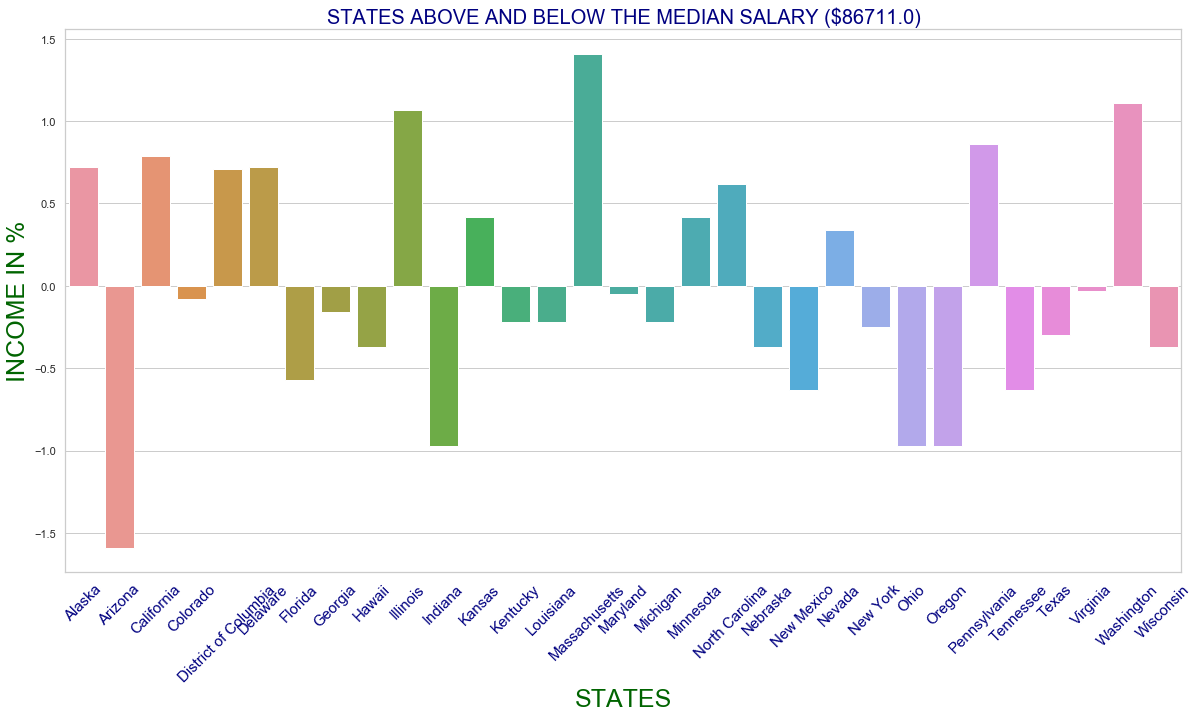

In [182]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="State", y="Income % above or below median", data=location_results)
ax.set_xticklabels(labels, rotation=45, size =15, color ='navy')
plt.title('STATES ABOVE AND BELOW THE MEDIAN SALARY ($86711.0)', size=20 , color ='navy')
plt.ylabel('INCOME IN %' , size = 25 , color ='darkgreen')
plt.xlabel('STATES', size=25 , color ='darkgreen')



# Clearly, states such as California, illinois,Massachusetts,pennsylvania and washington are above the median salary by a higher percentage.

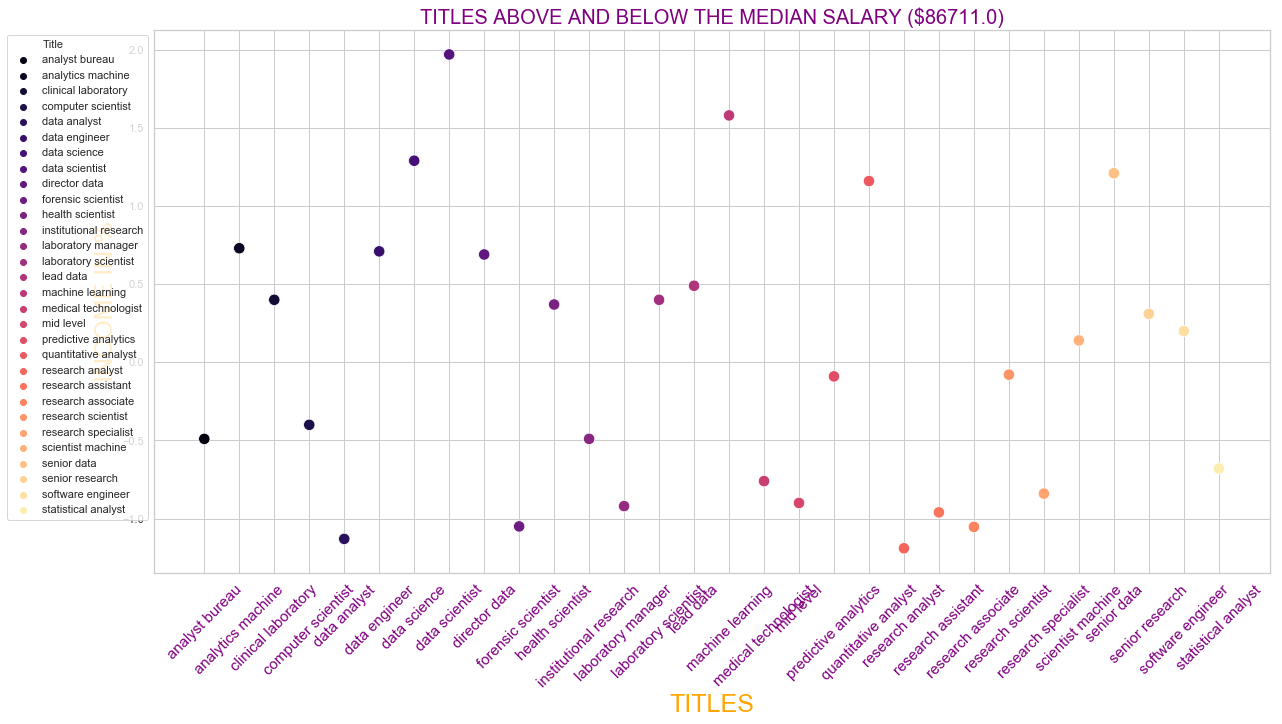

In [187]:
plt.figure(figsize=(20,10))

palette = sns.color_palette("bright", 6)
g = sns.scatterplot( x = 'Title' , y = 'Income % above or below median',data = title_results, hue ='Title',
               s = 130 , palette = 'magma')

g.set_xticklabels(labels = title_results["Title"], rotation = 45 , size =15, color ='purple')
plt.title('TITLES ABOVE AND BELOW THE MEDIAN SALARY ($86711.0)', size = 20 , color ='purple')
plt.ylabel('INCOME IN %' , size = 25 , color ='orange')
plt.xlabel('TITLES', size=25 , color ='orange')
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)


# The titles that have the best salaries above the median contain the following words : data engineer, data science, data scientist, machine-learning, predictive analytics, scientist machine learning.